## Assignment 3: Web Scraping

For this assignment, you are required to scrape data from e-commerce or other websites such as [Lelong](http://www.lelong.com.my), [Lazada](http://www.lazada.com.my/), [Mudah](http://www.mudah.my/), [iProperty](https://www.iproperty.com.my/), [Booking](http://www.booking.com), [Expedia](https://www.expedia.com.my/) etc.

You are required to fork this Jupyter Notebook from my Github [here](https://github.com/kuanhoong/EDS-Assignment3 ) and then scrape the latest 1000 items from one of the website mentioned above. The scraped data should include:

* Product Name/Product Title
* Amount/Price
* Brand
* Comments/Reviews
* Number of views

In addition, you are required to export the scraped data to dataframe format and also save a copy in csv format. Upon successful extracting data to dataframe, you are required to do a data analysis on the data. 

Your analysis should provide answers to the following questions:
* What do you think is interesting about this data? Tell a story about some interesting thing you have discovered by looking at the data.
* Visualize your data with matplotlib or with folium library package.

For example, you might consider whether there is a difference in pricings at different times doing the day or city, or whether other factors that influnced the pricings etc. Another thing you might consider is whether there is a relationship between the pricing and number of reviews or comments.

Show your analysis workflow in your Jupyter notebook.

The final submission should be pushed back to your respective Github account.

### Folium

[Folium](https://github.com/python-visualization/folium) makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

In [4]:
import pandas as pd
import re
import numpy as np
import folium
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import requests

In [2]:
mapit = None
latlon = [ (3.144473, 101.708722), (3.144473, 101.708722),(3.135732, 101.686989)]
for coord in latlon:
    mapit = folium.Map( location=[ coord[0], coord[1] ] )
    folium.Marker([3.144473, 101.708722], icon=folium.Icon(color='blue',icon='star'), popup='Federal Hotel').add_to(mapit)
    folium.Marker([3.156374, 101.714579], icon=folium.Icon(color='green',icon='info-sign') , popup='Mandarin Oriental').add_to(mapit)
    folium.Marker([3.135732, 101.686989], icon=folium.Icon(color='red',icon='star') , popup='Le Meridien').add_to(mapit)
mapit

In [3]:
# scrape from lelong

# find the pattern for the first page
url = 'https://www.lelong.com.my/catalog/all/list?TheKeyword=macbook+pro&D='

# write a loop to scrape from page 1 to the last page

product_name=[]
for page in range(1,19):
    url_page = url+str(page)
    scrape = requests.get(url_page)
    soup = BeautifulSoup(scrape.content, 'lxml')
    link = soup.find_all('div',{'class':'item','class':'summary'})
    length = len(link)
    for i in range(0,length):
        name = link[i].a.get('title')
        product_name.append(name)

In [4]:
# write to csv
# convert the list to a pandas dataframe

df = pd.DataFrame({'name':product_name})
df
df.to_csv('output.csv', index=False)

In [6]:
#Jason Phoon Answer for lelong.com.my
#The scraped data should include:
#Product Name/Product Title
#Amount/Price
#Brand
#Comments/Reviews
#Number of views

url = 'https://www.lelong.com.my/catalog/all/list?TheKeyword=macbook+pro&D='

names = []
prices = []
views = []

#rewrite...
for page in range(1,19):
    url_page = url+str(page)
    scrape = requests.get(url_page)
    soup = BeautifulSoup(scrape.content, 'lxml')
    for item in soup.find_all('div',{'class':'item'}):
        names.append(item.find('div',{'class':'summary'}).a.get('title'))
        prices.append(item.find('div',{'class':'col total'}).span.b.string)
        views.append(item.find('div',{'class':'list-sv-icon'}).find('span',{'class':'hit'}).string)
    
df = pd.DataFrame({'name':names, 'price': prices, 'view': views})
df.price = df.price.str.replace('RM','')
df.view = df.price.str.extract(r'(\d+)')

df.to_csv('output.csv', index=False)

df.tail()

C:\Users\pho01\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


,name,price,view
1028,New Battery APPLE Macbook PRO A1161 Bateri,480.00,480
1029,New Battery APPLE Macbook Pro A1278 Bateri,480.00,480
1030,New Adapter APPLE Macbook PRO A1502 Charger,300.00,300
1031,Thunderbolt Mini Displayport DP to VGA Adapter...,30.90,30
1032,Apple MacBook Pro 13 13.3 A1278 Transparent Cr...,29.99,29


In [136]:
#Scrape Propwall http://www.propwall.my/bangsar/classifieds?page=1&tab=Most%20Relevance&keywords=Bangsar%2C%20Kuala%20Lumpur&filter_id=18&filter_type=Location&listing=For%20Sale&view=list&map=on&blurb=0
#Compare Bangsar, KLCC and Subang Jaya area based on 500 records property prices over posted date time
#Jason Phoon:

def processData(url, location):
    #process data
    property_titles = []
    property_furnish = []
    property_rooms = []
    property_type = []
    property_posted_date = []
    property_price = []
    
    for page in range(1,25):
        url_page = url+str(page)
        scrape = requests.get(url_page)
        soup = BeautifulSoup(scrape.content, 'lxml')

        for media in soup.find_all('div',{'class':'media'}):
            title = media.find('h4',{'class','media-heading'}).a.string
            property_titles.append(title)

            facilities = media.find('div',{'class','media-body'}).find('ul',{'class','list-inline'}).find_all('li')

            if(len(facilities) > 2):
                furnish = (facilities[0].string.replace('\xa0|',''))
                ptype = (facilities[1].string.replace('\xa0|',''))
                posted_date = (facilities[2].string)
            else:
                furnish = (facilities[0].string.replace('\xa0|',''))
                ptype = ''
                posted_date = (facilities[1].string.replace('\xa0|',''))

            property_furnish.append(furnish)
            property_type.append(ptype)
            property_posted_date.append(posted_date)

            price = media.find('p',{'style':'margin:1%;font-weight:bold;font-size:25px;font-size:25px !important;line-height:15px;'})
            match = re.findall(r'>(.+?)<', str(price))
            if(len(match) > 1):
                total_price = float(str(match[0]).replace('RM','').replace(',',''))
            else:
                total_price = 0

            property_price.append(total_price)

    return pd.DataFrame({'title':property_titles,'location': location,'type': property_type,'posted_date': property_posted_date,'furnish': property_furnish,'total_price': property_price,})

    
property_bangsar_df = processData('http://www.propwall.my/bangsar/classifieds?tab=Most%20Relevance&keywords=Bangsar%2C%20Kuala%20Lumpur&filter_id=18&filter_type=Location&listing=For%20Sale&view=list&map=off&blurb=0&page='
,'Bangsar')
property_klcc_df = processData('http://www.propwall.my/klcc/classifieds?tab=Most%20Relevance&keywords=KLCC%2C%20KL%20City%20Centre&filter_id=16&filter_type=Location&listing=For%20Sale&view=list&map=on&blurb=0&page='
,'KLCC')
property_subangjaya_df = processData('http://www.propwall.my/subang_jaya/classifieds?tab=Most%20Relevance&keywords=Subang%20Jaya%2C%20Selangor&filter_id=22&filter_type=Location&listing=For%20Sale&view=list&map=on&blurb=0&page='
,'Subang Jaya')

#(property_bangsar_df.tail())
#(property_klcc_df.tail())
#(property_subangjaya_df.tail())

,furnish,location,posted_date,title,total_price,type
475,Unfurnished,Subang Jaya,13/04/2017,"Putra Heights, Subang Jaya",2300000.0,House
476,Semi-Furnished,Subang Jaya,12/06/2017,"Fairville Apartment, UEP Subang Jaya",0.0,Condominium
477,Semi-Furnished,Subang Jaya,11/07/2017 *,"Taman Bukit Pelangi, Subang Jaya",0.0,Condominium
478,Shop,Subang Jaya,11/07/2017 *,"USJ Sentral, UEP Subang Jaya",0.0,
479,Unfurnished,Subang Jaya,11/06/2017,"ResTrees, UEP Subang Jaya",0.0,House


In [288]:
frames = [property_bangsar_df, property_klcc_df, property_subangjaya_df]
property_df = pd.concat(frames)

In [289]:
#data sanitization
property_df.posted_date = pd.to_datetime(property_df.posted_date.str.replace(' *',''),errors='coerce')
property_df.total_price = property_df.total_price / 100000 #price too big..

In [298]:
highestPrice = property_df.groupby('location').max()

highestPrice.sort_values('total_price',ascending=False)

,furnish,posted_date,title,total_price,type
location,,,,,
KLCC,Unfurnished,2017-12-07,"myHabitat, KLCC",105360.0,Shop
Subang Jaya,Unfurnished,2017-12-07,"e-Tiara, Subang Jaya",1000.0,Shop
Bangsar,Unfurnished,2017-12-07,"Zehn Bukit Pantai, Bangsar",570.0,Shop


In [290]:
#property_df['date_time']
#calculate bangsar
bangsar_df  = property_df[(property_df.location == 'Bangsar') 
                          & (property_df.type != 'Shop') 
                          & (property_df.posted_date <= '2017-07-10')]
bangsar_df = bangsar_df.groupby('posted_date')
bangsar_high = bangsar_df.max()
bangsar_low = bangsar_df.min()

#calculate subang jaya
subang_jaya_df  = property_df[(property_df.location == 'Subang Jaya') 
                              & (property_df.type != 'Shop') 
                              & (property_df.posted_date <= '2017-07-10')]
subang_jaya_df = subang_jaya_df.groupby('posted_date')
subang_jaya_high = subang_jaya_df.max()
subang_jaya_low = subang_jaya_df.min()

#calculate KLCC
klcc_df  = property_df[(property_df.location == 'KLCC')  
                              & (property_df.posted_date <= '2017-07-10')]
klcc_df = klcc_df.groupby('posted_date')
klcc_high = klcc_df.max()
klcc_low = klcc_df.min()

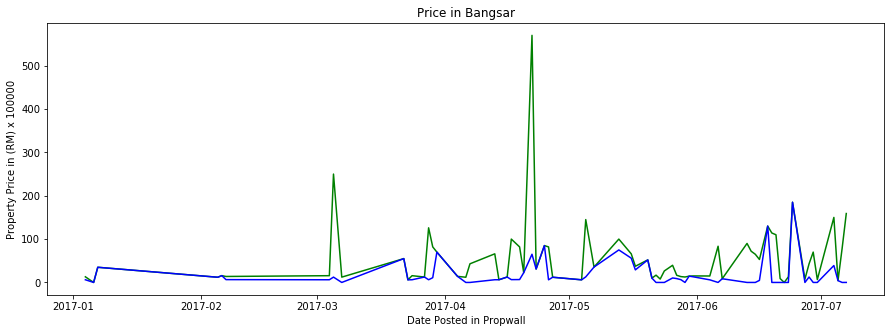

In [292]:
#Plot a graph to visualize
#your code here
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))
plt.plot(bangsar_high.index, bangsar_high.total_price, color='g')
plt.plot(bangsar_low.index, bangsar_low.total_price, color='b')
plt.ylabel('Property Price in (RM) x 100000')
plt.xlabel('Date Posted in Propwall')
plt.title('Price in Bangsar')

plt.show()

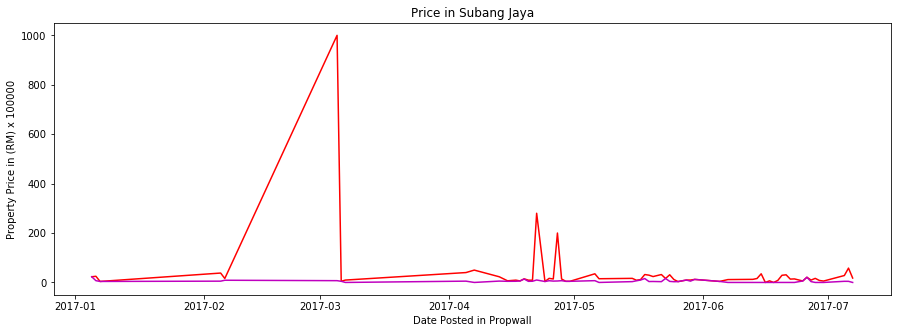

In [293]:
plt.figure(figsize=(15,5))
plt.plot(subang_jaya_high.index, subang_jaya_high.total_price, color='r')
plt.plot(subang_jaya_low.index, subang_jaya_low.total_price, color='m')
plt.ylabel('Property Price in (RM) x 100000')
plt.xlabel('Date Posted in Propwall')
plt.title('Price in Subang Jaya')

plt.show()

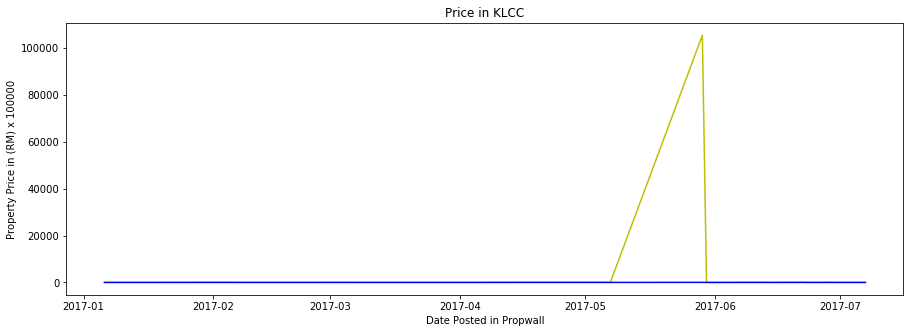

In [299]:
plt.figure(figsize=(15,5))
plt.plot(klcc_high.index, klcc_high.total_price, color='y')
plt.plot(klcc_low.index, klcc_low.total_price, color='b')
plt.ylabel('Property Price in (RM) x 100000')
plt.xlabel('Date Posted in Propwall')
plt.title('Price in KLCC')

plt.show()

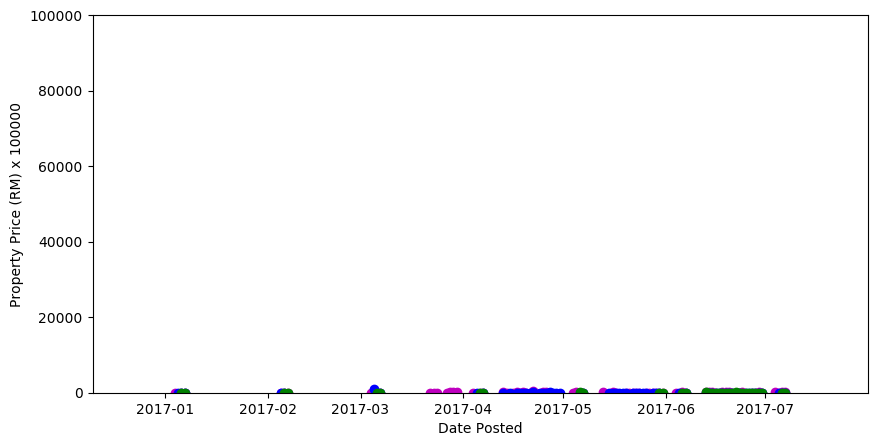

In [328]:
plt.figure(figsize=(10,5), dpi=100)
plt.scatter(bangsar_high.index, bangsar_high.total_price, c = 'm', label = 'Bangsar highest Price')
plt.scatter(subang_jaya_high.index, subang_jaya_high.total_price, c = 'b', label = 'Subang Jaya highest Price')
plt.scatter(klcc_high.index, klcc_high.total_price, c = 'g', label = 'KLCC highest Price')
plt.ylim((0,100000))
plt.xlabel('Date Posted')
plt.ylabel('Property Price (RM) x 100000')
plt.show()